# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

## Background: 

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

## Objective:

Statistical analysis of business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected to perform the statistical analysis to answer the following questions:

1. Explore the dataset and extract insights using Exploratory Data Analysis.

2. Do the users spend more time on the new landing page than the old landing page?

3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

5. Is the mean time spent on the new page same for the different language users?

*Consider a significance level of 0.05 for all tests.

## Data Dictionary:

1. user_id - This represents the user ID of the person visiting the website.

2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).

3. landing_page - This represents whether the landing page is new or old.

4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.

5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.


## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [3]:
# read the dataset abtest.csv
df = pd.read_csv("abtest.csv")

### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

In [4]:
# copying data to another variable to avoid any changes to original data
df_backup = df.copy()

# returns the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Observations:

The DataFrame has 6 columns and looks consistent with the description provided in the Data Dictionary.

In [5]:
df.shape

(100, 6)

#### Observations:  
The dataset has 100 rows and 6 columns.

In [6]:
# print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations:
* There are 2 numeric columns: user_id and time spent on page.
* There are 4 object columns: group, landing_page, converted, and language preferred.
* There are 100 non-null values in every column.
* The memory usage is 4.8+ KB.


In [7]:
#convert the object data types group, landing_page, converted, and language_preferred to categorical data.
df.group = df.group.astype('category')
df.landing_page = df.landing_page.astype('category')
df.converted = df.converted.astype('category')
df.language_preferred = df.language_preferred.astype('category')

# print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


#### Observations:
* There are 2 numeric columns: user_id and time spent on page.
* There are 4 categorical columns: group, landing_page, converted, and language preferred.
* The memory usage has been changed from 4.8+ KB to 2.6 KB.

In [8]:
# checking missing values
df.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#### Observations
There are no missing values

In [9]:
#check that there are no duplicate users
df.user_id.value_counts().max()

1

#### Observations
Each user id is used only once, there are no duplicate users.

In [10]:
# create the contingency table showing the control group landing page and treatment group landing page
contingency_table = pd.crosstab(df['group'],df['landing_page'])
contingency_table

landing_page,new,old
group,,
control,0,50
treatment,50,0


#### Observations
* There are two groups types: treatment and control - control has 50 entries, treatment also has 50 entries.
* There are two landing_page types: old and new - new has 50 entries, old also has 50 entries.
* As described in the problem statement, all users in the control group viewed the old landing page, and those in the treatment group viewed the new landing page. 

In [11]:
# statistical summary of numeric columns
df.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


#### Observations:
* The mean time spent on the page is 5.38 minutes.
* The median time spent on the page 5.42 minutes.
* The minimum time spent on the page is 0.19 minutes and the maximum is 10.71 minutes.

In [12]:
# statistical summary of numeric columns
df.describe(include='category').T

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,new,50
converted,100,2,yes,54
language_preferred,100,3,French,34


#### Observations:
* There are 100 values in each of the categorical columns.
* Group, landing_page, and converted each have 2 unique values.
* Language_preferred has 3 unique values.
* There are two converted groups: yes and no - yes has 54 entries and no has 46 (100 total - 54 yes).
* There are 3 preferred languages: French, English, and Spanish - French is shown to be the most common with 34 entries (tied with Spanish as shown below).

### Univariate Analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, hue=None, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
    plt.xticks(rotation=90, fontsize=15)
    if hue is None:
        ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index,);
    else:
        ax = sns.countplot(data=data,x=feature,hue=hue,palette="Paired",order=data[feature].value_counts().index,);
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) # legend placement
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage
    plt.show()  # show the plot

#### Observations on group

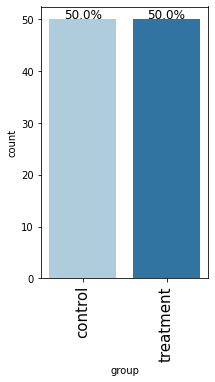

In [15]:
labeled_barplot(df, 'group',perc=True);

##### Observations:
* Control and treatment groups have equal frequencies of 50 each.

#### Observations on landing page

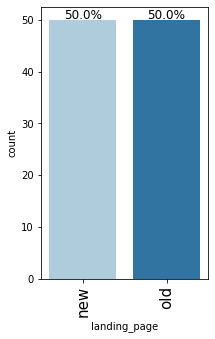

In [16]:
labeled_barplot(df, 'landing_page',perc=True);

##### Observations:
* New and old landing pages have equal frequencies of 50 each.

#### Observations on converted

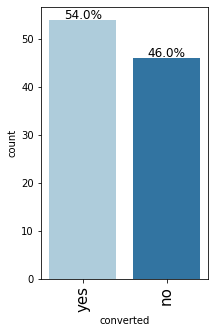

In [17]:
labeled_barplot(df, 'converted',perc=True);

##### Observations:
* More users are converted than not converted - 54 converted and 46 not converted.

#### Observations on language preferred

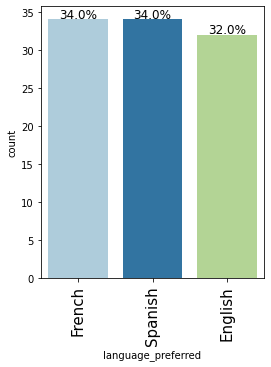

In [18]:
labeled_barplot(df, 'language_preferred',perc=True);

##### Observations:
* There are 34 French and Spanish language preferred users, and 32 English language preferred users.

#### Observations on time spent on the page

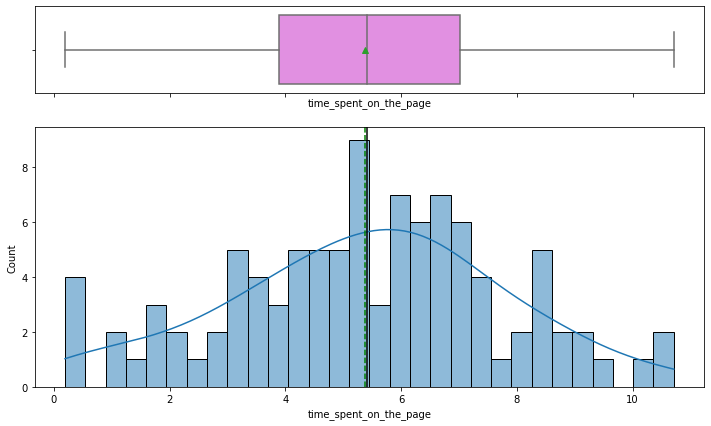

In [19]:
histogram_boxplot(df, 'time_spent_on_the_page', figsize=(12, 7), kde=True, bins=30);

In [20]:
print('the mean time spent on the page is',round(df['time_spent_on_the_page'].mean(),2), 'minutes')
print('the median time spent on the page is', round(df['time_spent_on_the_page'].median(),2), 'minutes')

the mean time spent on the page is 5.38 minutes
the median time spent on the page is 5.42 minutes


##### Observations:
* The mean and median times spent on the page are very similar, 5.38 and 5.42 minutes respectively.
* The distribution is fairly symmetric.

### Bivariate Analysis

#### Observation of time spent on page and conversion

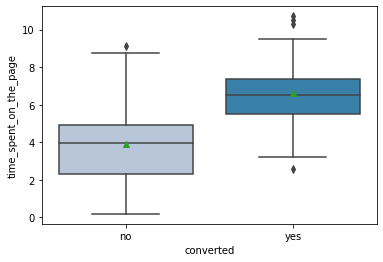

In [21]:
sns.boxplot(x="converted", y='time_spent_on_the_page', data=df, showmeans=True, palette = 'PuBu');

### Observation
* The converted users have a greater mean and median time spent on the page.
* The converted users have more outliers in their distribution of time spent on the page.

#### Observation of time spent on the page and preferred language

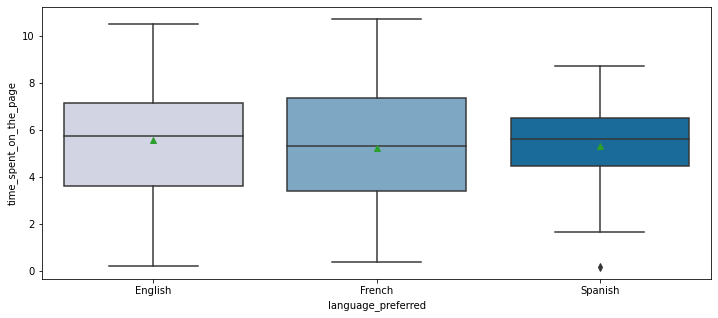

In [22]:
# create a boxplot to compare the time spent on the page distributions for each preferred language 
sns.boxplot(x="language_preferred", y='time_spent_on_the_page', data=df, showmeans=True, palette = 'PuBu');
plt.gcf().set_size_inches(12, 5);

#### Observations
* The mean and median time spent on the page is between 5 and 6 minutes for all three preferred languages.
* English has the greatest mean and median times, followed closely by Spanish, and then French.
* The time spent on the page distribution is mostly symmetric for all three.

### Observation of time_spent on the page by preferred language and landing page

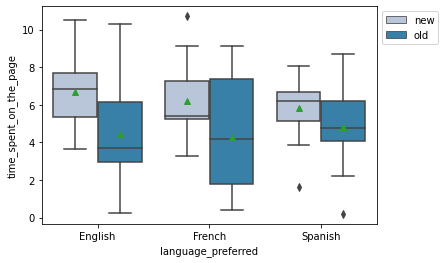

In [23]:
# create a boxplot to compare the time spent on the page distributions for each preferred language and landing page
sns.boxplot(x="language_preferred", y='time_spent_on_the_page', hue = 'landing_page', data=df, showmeans=True, palette = 'PuBu');
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

#### Observations
* For all preferred languages, it appears that more time is spent on the new landing page than the old landing page.
* For all preferred languages, it appears that the interquartile range is narrower for the distribution of times spent on the new page as compared to the old page.

#### Observation of converted and preferred language

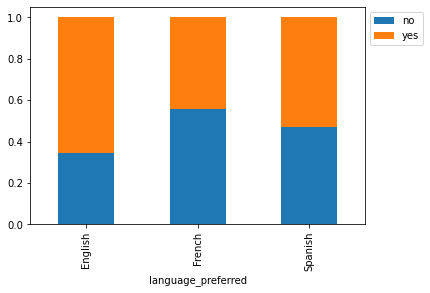

In [24]:
# create a stacked bar plot to compare the distributions of both the categorical features
pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind='bar',stacked =True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#### Observations
* Of the preferred languages, English has the greatest proportion of converted users and French has the smallest proportion of converted users.

#### Observation of group and preferred language

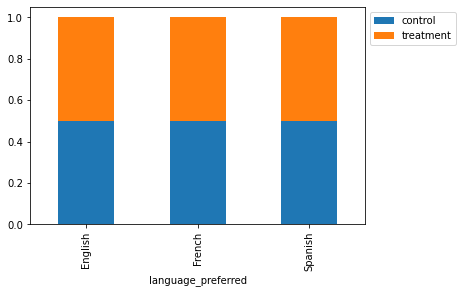

In [25]:
# create a stacked bar plot to compare the distributions of both the categorical features
pd.crosstab(df['language_preferred'],df['group'],normalize='index').plot(kind='bar',stacked =True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

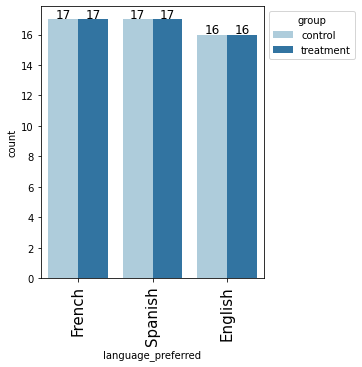

In [26]:
labeled_barplot(df, 'language_preferred', hue = 'group',perc=False);

### Observations
* For each preferred language, the conrol group has the same number of users as the treatment group.
* There is one less control and treatment group user with English as the preferred language, compared to French and Spanish.

#### Observation of time spent on the page by group

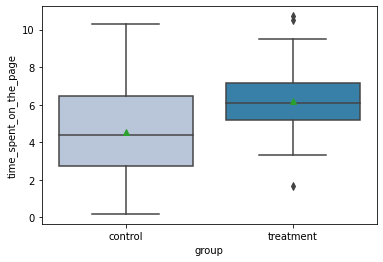

In [27]:
sns.boxplot(x="group", y='time_spent_on_the_page', data=df, showmeans=True, palette = 'PuBu');

#### Observations
* The treatment group has a greater mean and median time spent on the page.
* The interquartile range of times spent on the page is narrower for the treatment group, but contains more outliers.
* Both distributions look mostly symmetric.

#### Observation of time spent on the new page and language preferred

### Insights based on EDA
* The control and treatment groups have an equal number of users.
* There is mostly even representation of preferred language in the control and treatment groups (one less English user in each group).
* The treatment group (new landing page) has greater mean and median times spent on the page than the control group (old page).
* It appears that converted users spend more time on the page.
* It appears that more English preferred language users are converted.
* It appears that the time spent on the page is similar for all preferred languages when grouping the new and old pages, but different when separating the pages between new and old.

### Recommendations
* Determine whether the  greater mean time spent on the new landing page as compared to the old landing page is statistically significant.
* More users in the treatment group (new page) are converted as to the control group (old page). It is recommended that testing is done to determine if the greater conversion rate in the treatment group (new page) is statistically significant.
* Given that more English preferred language users are converted, it is recommended that further testing is done to see if conversion rate is related to the preferred language. 
* Lastly, it is recommended that a test is done to determine if any of the languages have statistically significant different times spent on the new page.

## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

### Perform Visual Analysis

#### Observation of time spent on the page by landing page

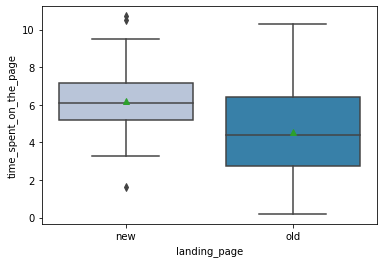

In [28]:
sns.boxplot(x="landing_page", y='time_spent_on_the_page', data=df, palette = 'PuBu', showmeans=True);

#### Observation
* It appears that more time is spent on the new landing page than the old landing page.

### Step 1: Define the null and alternate hypotheses

### the null and alternative hypothesis
Let $\mu_{new}, \mu_{old}$ be the mean time spent by users on the new and the old landing page respectively.

Test the null hypothesis

>$H_0:\mu_{new}=\mu_{old}$

against the alternate hypothesis

>$H_a:\mu_{new}>\mu_{old}$

### Step 2: Select Appropriate test

### T-test for equality of means - unequal standard deviations assumptions 

* Continuous data - The time spent is continuous.
* Normally distributed populations or Sample sizes > 30 - Since the sample sizes are greater than 30, Central Limit Theorem states that the distribution of sample means will be normal.
* Independent populations - As we are taking samples for two different landing pages, the two samples are from two independent populations.
* Unequal population standard deviations - If the sample standard deviations are different, the population standard deviations may be assumed to be different - check below
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

In [29]:
#show the standard deviation in time_spent_on_the_page for the new and old landing pages
df.groupby('landing_page').time_spent_on_the_page.std().reset_index()

,landing_page,time_spent_on_the_page
0,new,1.817031
1,old,2.581975


#### The standard deviations appear different, a Levene's is done below to test whether the difference is significant

### Levene's test 


Test the null hypothesis

>$H_0:\sigma^{2}_{new}=\sigma^{2}_{old}$

against the alternate hypothesis

>$H_a:\sigma^{2}_{new}\neq\sigma^2_{old}$


In [30]:
new_page = df[df['landing_page']=='new']
new_page.head()
new_page
old_page = df[df['landing_page']=='old']

### Trying an F-Test

In [31]:
# import the required function
from scipy.stats import f

# user-defined function to perform F-test
# To know more about the derivation of test statistic formula, please refer to the monographs and additional materials
def f_test(x, y):
  x = np.array(x)
  y = np.array(y) 
  test_stat = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
  dfn = x.size-1 #define degrees of freedom numerator 
  dfd = y.size-1 #define degrees of freedom denominator 
  p = (1 - f.cdf(test_stat, dfn, dfd)) # find p-value of F test statistic 
  p1 = p*2 # Converting one-tail to two-tail test 
  return(print("The p_value is {}" .format(round(p,8)))) 

#perform F-test 
f_test(new_page['time_spent_on_the_page'], old_page['time_spent_on_the_page'])

The p_value is 0.9922944


#### Significance level: $\alpha = 0.05$

In [30]:
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df['time_spent_on_the_page'][df['landing_page']=="new"], 
                                   df['time_spent_on_the_page'][df['landing_page']=="old"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.008950671168914445


Since the p-value of 0.009 is less than 0.05, I reject the null hypothesis that the variances are equal - and accept that the variances are unequal, and therefore the standard deviations are unequal.

#### Test Choice: two independent sample t-test for equality of means - unequal std dev for this problem.

### Step 3: Decide the significance level

#### Significance level: $\alpha = 0.05$

### Step 4: Collect and prepare the data

In [31]:
# Keep rows where the landing_page is equal to new and save them in new_page dataframe
new_page = df[df['landing_page']=='new']
# Keep rows where the landing_page is equal to old and save them in old_page dataframe
old_page = df[df['landing_page']=='old']

In [32]:
# find the sample means and sample standard deviations for the two samples
print('The mean time spent by users on the old landing page is ' + str(round(old_page['time_spent_on_the_page'].mean(),1)) + ' minutes.')
print('The mean time spent by users on the new landing page is ' + str(round(new_page['time_spent_on_the_page'].mean(),1)) + ' minutes.') 
print('The standard deviation of the time spent by users on the old landing page is ' + str(round(old_page['time_spent_on_the_page'].std(),1)) + ' minutes.')
print('The standard deviation of the time spent by users on the new landing page is ' + str(round(new_page['time_spent_on_the_page'].std(),1)) + ' minutes.')

The mean time spent by users on the old landing page is 4.5 minutes.
The mean time spent by users on the new landing page is 6.2 minutes.
The standard deviation of the time spent by users on the old landing page is 2.6 minutes.
The standard deviation of the time spent by users on the new landing page is 1.8 minutes.


The sample size is 50 for each the time spent by users on the old landing page and for the time spent by users on the new landing page.


### Step 5: Calculate the p-value

In [33]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(new_page['time_spent_on_the_page'], old_page['time_spent_on_the_page'], equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

The p-value of 0.00014 is less than th $\alpha$ of 0.05.

### Step 7:  Draw inference

As the p-value is much less than the level of significance 0.05, I reject the null hypothesis. Thus, there is enough statistical evidence to say that the time spent on the new landing page is greater than the time spent on the old landing page.

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

### Visual analysis of the conversion rate for the new page and for the old page

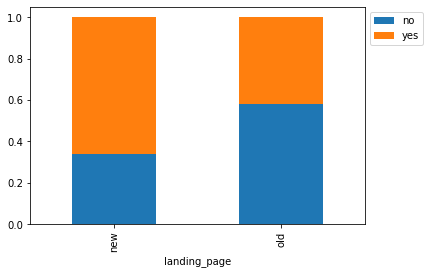

In [34]:
# create a stacked bar plot to compare the distributions of both the categorical features
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind='bar',stacked =True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

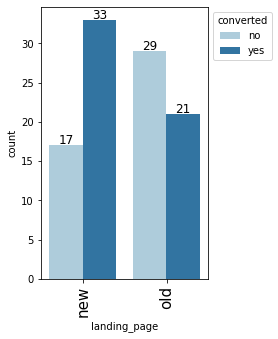

In [35]:
labeled_barplot(df, 'landing_page', hue = 'converted',perc=False);

### Observations
* It appears that a larger proportion of users who visit the new landing page get converted than the proprtion of users who visit the old landing page.

### The null and alternative hypothesis

Let $p_{new},p_{old}$ be the proportions of users who visit the new and old landing page and get converted respectively.

The null hypothesis

>$H_0:p_{new} = p_{old}$

The alternate hypothesis

>$H_a:p_{new} > p_{old}$

### Test selection

#### Two proportion z-test assumptions

*   Binomally distributed population - Yes, the user is either converted to the page or not.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample. 
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_{new} = 50\cdot \frac{33}{50} = 33 \geq 10\\
n(1-p_{new}) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_{old} = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_{old}) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $

Test Choice: two proportion z-test for this problem.

### Significance Level
$\alpha = 0.05$

### Collect and prepare data

In [36]:
# keep rows where users are converted
new_converted = new_page[new_page['converted']=='yes']
old_converted = old_page[old_page['converted']=='yes']
# find the proportion of users who visit each page and are converted for the two samples
print('The proportion of users who visit the new landing page and are converted is ' + str(round(len(new_converted['converted']),1)) + '/' + str(round(len(new_page['converted']),1)))
print('The proportion of users who visit the new landing page and are converted is ' + str(round(len(old_converted['converted']),1)) + '/' + str(round(len(old_page['converted']),1)))

The proportion of users who visit the new landing page and are converted is 33/50
The proportion of users who visit the new landing page and are converted is 21/50


### Calculate the p-value

In [37]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of defective items
converted_count = np.array([33, 21])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(converted_count, nobs, alternative = 'larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Compare the p-value with $\alpha$

The p-value of 0.008 is less than th $\alpha$ of 0.05.

### Inference

As the p-value of 0.008 is less than the level of significance 0.05, I reject the null hypothesis. Thus, there is enough statistical evidence to say that the conversion rate for the new landing page is greater than the conversion rate for the old landing page.

## 4. Is the conversion and preferred language are independent or related? (10 Marks)

### Visual analysis of the conversion and preferred language

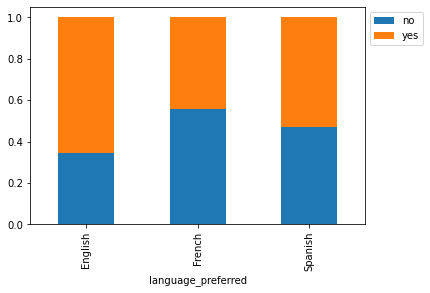

In [38]:
# create a stacked bar plot to compare the distributions of both the categorical features
pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind='bar',stacked =True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

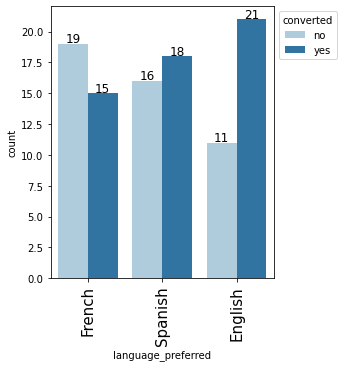

In [39]:
labeled_barplot(df, 'language_preferred', hue = 'converted',perc=False);

### Observations
* It appears that the conversion rate is different for English preferred language users as compared to the conversion rates for French and Spanish users.

### The null and alternative hypothesis

the null hypothesis
>$H_0:$ conversion is independent of preferred language.

alternate hypothesis
>$H_a:$ conversion depends on preferred language.

### Test selection

Chi-square test for independence assumptions
* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

Test Choice: Chi-square test for independence for this problem.

### Significance level

$\alpha = 0.05$

### Collect and prepare data

In [40]:
# Method 1: Create table modeled after beverage table in Notebook_Week3
#create new df with rows where converted = yes
converted = df[df['converted']=='yes']
#create new df with rows where converted = no
not_converted = df[df['converted']=='no']

lang_conv = converted.groupby("language_preferred")["converted"].count().reset_index();
lang_nconv = not_converted.groupby("language_preferred")["converted"].count().reset_index();
lang_conv['not_converted']=lang_nconv['converted']
lang_conv

,language_preferred,converted,not_converted
0,English,21,11
1,French,15,19
2,Spanish,18,16


In [41]:
# Method 2: create the contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['language_preferred'],df['converted'])
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Calculate the p-value

In [42]:
import pandas as pd
from scipy.stats import chi2_contingency

#Using Table from Method 1:
chi2, pval, dof, exp_freq = chi2_contingency(lang_conv.drop('language_preferred', axis = 1))

#Using Table from Method 2 (commented out)
#chi2, pval, dof, exp_freq = chi2_contingency(contingency_table)

#Method 3: Creating a df from a dictionary (commented out)
#df = pd.DataFrame({'English': [21, 11], 'French': [15, 19], 'Spanish':[18,16]}, index = ['Converted', 'Not Converted'])
#chi2, pval, dof, exp_freq = chi2_contingency(df)
print(pval)

0.2129888748754345


### Compare the p-value with $\alpha$

The p-value of 0.21 is greater than th $\alpha$ of 0.05.

### Insight
As the p-value is greater than the significance level, I fail to reject the null hypothesis. Hence, I do not have enough statistical significance to conclude that conversion is related to preferred language at 5% significance level.

## 5. Is the time spent on the new page same for the different language users? (10 Marks)

### Visual analysis of the time spent on the new page and preferred language

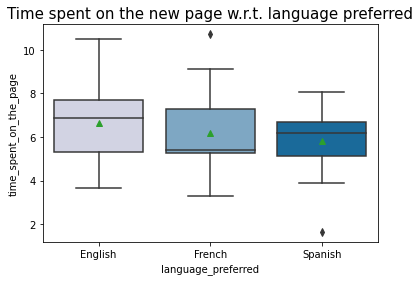

In [43]:
# draw the boxplot for visualization 
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = new_page, showmeans=True, palette = 'PuBu') 
a.set_title("Time spent on the new page w.r.t. language preferred", fontsize=15)
plt.show()

### Observations
* The mean and median times spent on the new page appear different for different language users.

### The null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of the time spent on the new page for languages English, French and Spanish respectively.

I will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one time spent on the new page is different from the rest.

### Test selection

One Way ANOVA Assumptions

* The populations are normally distributed
* Samples are independent simple random samples
* Population variances are equal

Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

I will test the null hypothesis

>$H_0:$ Time spent on the new landing page follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on the new landing page does not follow a normal distribution

In [44]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(new_page['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, I fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

I will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [45]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( new_page['time_spent_on_the_page'][new_page['language_preferred']=="English"], 
                                   new_page['time_spent_on_the_page'][new_page['language_preferred']=="French"], 
                                   new_page['time_spent_on_the_page'][new_page['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, I fail to reject the null hypothesis of homogeneity of variances.

#### One way ANOVA assumptions 

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

Test Choice: One way ANOVA

### Significance level

$\alpha = 0.05$

### Collect and prepare data

In [46]:
# mean of time spent on the new landing page by preferred language
lang_timespent = new_page.groupby("language_preferred")["time_spent_on_the_page"].mean().reset_index()
lang_timespent.head()

,language_preferred,time_spent_on_the_page
0,English,6.663750
1,French,6.196471
2,Spanish,5.835294


### Calculate the p-value

In [47]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(new_page.loc[new_page['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              new_page.loc[new_page['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              new_page.loc[new_page['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Compare the p-value with $\alpha$

The p-value of 0.43 is greater than th $\alpha$ of 0.05.

### Insight
As the p-value is greater than the significance level, I fail to reject the null hypothesis. Hence, I do not have enough statistical significance to conclude that  at least one time spent on the new landing page is different from the rest at 5% significance level.

## Conclusion and Business Recommendations

* More time is spent on the new landing page than the old landing page, as shown using a t-test for equality of means - unequal standard deviations.
* The mean time spent on the new landing page by different language users was not statistically different, as shown using a One Way ANOVA test.
* Conversion was shown to be independent of preferred language, as shown using a Chi-Square Test for Independence.
* The proportion of users who get converted after visiting the new landing page was greater than the proportion of users who get converted after visiting the old landing page, as shown using a two proportion z-test.

#### Recommendations
* It is recommended that the new landing page feature is fully integrated into the site.
* Although conversion proportion was shown to be statistically independent of preferred language, the conversion rate by language had variations in their distributions. Therefore, it is recommded that the company continues to monitor this data in order to make sure they are continuing to convert all preferred language users equally.